PROJECT OF RETIAL ANOMALY DETECTION

At first, we import necessary libraries and load the data from retail1.csv 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')


/Users/lientran/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

df= pd.read_csv(r'/Users/lientran/Documents/Machine_Learning _Project/Machine-learning/Retail Anomaly Detection/retail1.csv')


# df= pd.read_csv(r'C:\Users\bichl\Documents\Machine_Learning _Project\Machine-learning\Retail Anomaly Detection\retail1.csv')
#C:\Users\bichl\Documents\Machine_Learning _Project\data
print(df)

       Unnamed: 0  DocumentID        Date   SKU        Price     Discount  \
0               0         716  2019-09-23  1039   381.780000    67.372540   
1               1         716  2019-09-23   853   593.220000     0.000340   
2               2         716  2019-09-23   862   423.730000    -0.001190   
3               3         716  2019-09-23   868   201.700000    35.588140   
4               4         716  2019-09-23  2313   345.760000    61.019660   
...           ...         ...         ...   ...          ...          ...   
33351       33351       13315  2022-11-09  1849  5957.627119  1072.372881   
33352       33352       13316  2022-11-09    30  1271.186441   228.813559   
33353       33353       13317  2022-11-09  2066  1355.932203   244.067797   
33354       33354       13318  2022-11-09  1586  2334.745763   420.254237   
33355       33355       13319  2022-11-09  1408  1368.644068   246.355932   

       Customer  Quantity  
0             1       1.0  
1             1    

In [3]:
print(df.columns)
df.shape
df.dtypes
df.describe()

Index(['Unnamed: 0', 'DocumentID', 'Date', 'SKU', 'Price', 'Discount',
       'Customer', 'Quantity'],
      dtype='object')


,Unnamed: 0,DocumentID,SKU,Price,Discount,Customer,Quantity
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000
mean,16677.500000,8227.577227,1241.273174,2915.716875,591.249968,307.968581,5.760695
std,9629.192126,4028.047727,893.872164,10285.512325,3508.983569,162.675166,19.550559
min,0.000000,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000
25%,8338.750000,5399.750000,503.000000,661.016949,95.674576,179.000000,2.000000
50%,16677.500000,8733.000000,1008.000000,1203.389830,195.254237,286.000000,4.000000
75%,25016.250000,10857.000000,2078.250000,2572.194915,423.489661,427.000000,4.000000
max,33355.000000,15751.000000,2904.000000,522767.340000,240396.660000,605.000000,1246.000000


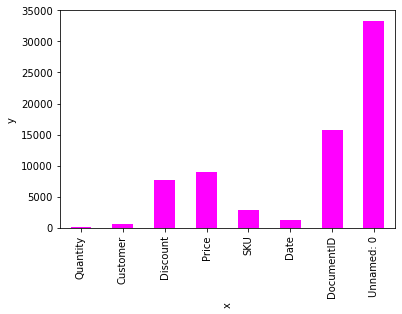

In [4]:

# creating a bar plot with unique value counts for each column in the dataframe

plot1 = df.nunique().plot.bar(color="magenta")
plot1.set_xlabel("x",rotation=90)
plot1.set_ylabel("y",rotation=90)
plot1.invert_xaxis()

In [5]:

# identify and extract rows with the highest 'Price' values from the original DataFrame df and stores them in the df_anomaly DataFrame for further analysis or inspection.

df.sort_values('Price',ascending=False).head(5)

df_anomaly = df.sort_values('Price', ascending = False).head(2)
df_anomaly.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
29772,29772,14458,2022-07-27,978,522767.34,240396.66,418,612.0
31595,31595,14974,2022-10-08,2817,508240.00,0.00,418,1.0


In [6]:
# sorting the DataFrame df by the 'Price' column in descending order and selecting the top 2 rows with the highest prices, then retrieving the index values of these top 2 rows and converts them into a list.

list(df.sort_values('Price', ascending = False).head(2).index)

# removing the 2 rows with the highest prices from the DataFrame df

df = df.drop(list(df.sort_values('Price', ascending = False).head(2).index))
df.sort_values('Price', ascending = False).head(10)

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
27544,27544,15211,2022-05-07,2086,368644.070000,0.000000,433,60.0
31261,31261,14998,2022-10-11,2817,334161.000000,0.000000,418,1.0
15308,15308,0,2020-11-17,541,332574.460000,-0.003959,506,2.0
29827,29827,7218,2022-07-07,611,332559.020000,143715.980000,414,500.0
14003,14003,0,2020-11-16,541,332383.010000,0.000000,506,2.0
29828,29828,7218,2022-07-07,611,331893.899999,143428.550001,414,499.0
29819,29819,7217,2022-07-28,614,324878.270000,140396.730000,414,500.0
29818,29818,7217,2022-07-28,614,324878.270000,140396.730000,414,500.0
32329,32329,14560,2022-08-25,1443,283302.800000,139537.200000,418,310.0
29770,29770,14458,2022-07-27,1456,279495.900000,178694.100000,418,270.0


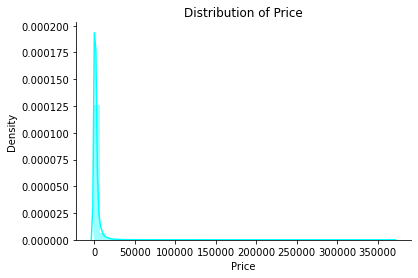

In [7]:
# creating a distribution plot (histogram) of the 'Price' column in the DataFrame df using the seaborn library. The bars in the plot represent the distribution of prices, and they are colored cyan.

plot2 = sns.distplot(df['Price'],color="cyan")
plt.title("Distribution of Price")
sns.despine() # removing the top and right spines (lines) from the plot

In [8]:

# Creating an instance of the IsolationForest class from scikit-learn and specifies the number of decision trees (estimators) to be used in the isolation forest. Using 100 decision trees.
isolation_forest = IsolationForest(n_estimators=100)

# Fits (trains) the isolation forest model on the values of the 'Price' column from DataFrame df. The reshape(-1, 1) operation is used to ensure that the input data is in the correct shape for the algorithm, which expects a two-dimensional array.
isolation_forest.fit(df['Price'].values.reshape(-1, 1))

# creating a range of values for the 'Price' column that spans from the minimum price value in the DataFrame to the maximum price value. np.linspace is used to generate equally spaced values, and reshape(-1,1) is applied to make it a two-dimensional array.
xx = np.linspace(df['Price'].min(), df['Price'].max(), len(df)).reshape(-1,1)

# Calculates the anomaly scores for each value in the xx range using the decision function of the trained isolation forest model. The anomaly score quantifies how anomalous each data point is. Higher scores indicate greater anomaly.
anomaly_score = isolation_forest.decision_function(xx)

# Predicting whether each data point in the xx range is an outlier (anomaly) or not. The predict method returns -1 for outliers and 1 for inliers (non-outliers).
outlier = isolation_forest.predict(xx)




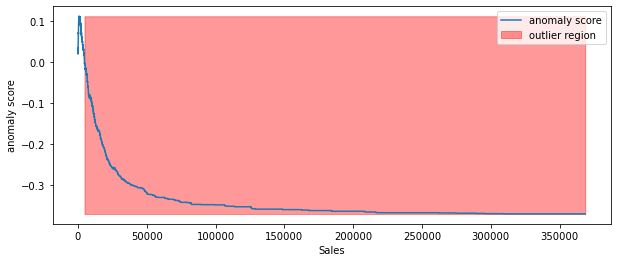

In [9]:

# Initializing a new figure for the plot with a specified figsize of 10 inches in width and 4 inches in height
plt.figure(figsize=(10,4))

# Ploting the anomaly scores calculated earlier (anomaly_score) against the values of 'Price' in the xx range. It labels the line on the plot as "anomaly score."
plt.plot(xx, anomaly_score, label='anomaly score')

# filling the region between the minimum and maximum anomaly scores with a red color for data points that have been predicted as outliers (outlier==-1). This helps visually distinguish the region containing potential outliers.
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')


# Adding a legend to the plot to label the two components: "anomaly score" and "outlier region."
plt.legend()

# Set the label for the y-axis as "anomaly score."
plt.ylabel('anomaly score')

# set the label for the x-axis as "Sales."
plt.xlabel('Sales')

# Displays the plot.
plt.show();

In [10]:

# Sorts the original DataFrame df by the 'Price' column in descending order. 

df_anomaly = df.sort_values('Price', ascending = False).head(2)

# These are the 2 rows with the highest 'Price' values.

df_anomaly.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
27544,27544,15211,2022-05-07,2086,368644.07,0.0,433,60.0
31261,31261,14998,2022-10-11,2817,334161.00,0.0,418,1.0


In [11]:
# Adding a new column to DataFrame df that stores the anomaly scores for each row, indicating how anomalous each data point is based on the Isolation Forest model. The higher the anomaly score, the more likely a data point is considered an outlier or anomaly.

df['AnomalyScore'] = anomaly_score

# Sorts the DataFrame df by the 'AnomalyScore' column in descending order and selects the top rows with the highest anomaly scores. The default number of rows returned by .head() is 5, so this line will show the top 5 rows with the highest anomaly scores.
df.sort_values('AnomalyScore',ascending = False).head()

#  concatenates the rows with the lowest anomaly scores from the sorted DataFrame df (in ascending order) with the existing df_anomaly DataFrame. It effectively extends the df_anomaly DataFrame with additional rows representing potential anomalies with low anomaly scores. The number of rows added is limited to the top 10 rows with the lowest anomaly scores.

df_anomaly = pd.concat([df_anomaly,
        df.sort_values('AnomalyScore',ascending = True).head(10)]
)
df_anomaly.head()

# etrieves the index values of the top 10 rows with the highest anomaly scores in the DataFrame df.

list(df.sort_values('AnomalyScore',ascending = False).head(10).index)
df.head()

# Filters and displays the rows in the DataFrame df where the 'Price' column contains NaN (missing) values.
df[df['Price'].isna()].head()

# Reinitializes the Isolation Forest model with 100 estimators (decision trees).
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Price'].values.reshape(-1, 1))

IsolationForest()

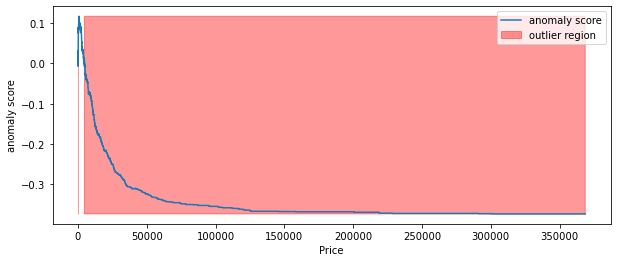

In [12]:


# Creates an array xx that represents a range of values for the 'Price' column.
# And reshape(-1,1) the array to be a column vector.

xx = np.linspace(df['Price'].min(), df['Price'].max(), len(df)).reshape(-1,1)

# Calculate the anomaly scores for each value in the xx range using the decision function of the trained Isolation Forest model (isolation_forest). These anomaly scores quantify how anomalous each data point is.
anomaly_score = isolation_forest.decision_function(xx)

# Predicts whether each data point in the xx range is an outlier (anomaly) or not using the Isolation Forest model. The predict method returns -1 for outliers and 1 for inliers (non-outliers).
outlier = isolation_forest.predict(xx)


# Initializes a new figure for the plot with a specified figsize of 10 inches in width and 4 inches in height. It sets the size of the plot canvas.
plt.figure(figsize=(10,4))

# Fills the region between the minimum and maximum anomaly scores with a red color (color='r') for data points that have been predicted as outliers.
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')

# Adds a legend to the plot to label the two components: "anomaly score" and "outlier region."
plt.legend()

# Sets the label for the y-axis as "anomaly score."
plt.ylabel('anomaly score')

# Sets the label for the x-axis as "Price."
plt.xlabel('Price')

plt.show();

As observed, points with score below threshold of 0.02 are shaded as outliers.